<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/K_Fold_vaildation_with_Bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
bank = pd.read_csv(io.BytesIO(uploaded['bank-data.csv']))

Saving bank-data.csv to bank-data (5).csv


In [ ]:
bank=bank.drop("id",axis=1)
bank

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
bank = bank.apply(LabelEncoder().fit_transform)



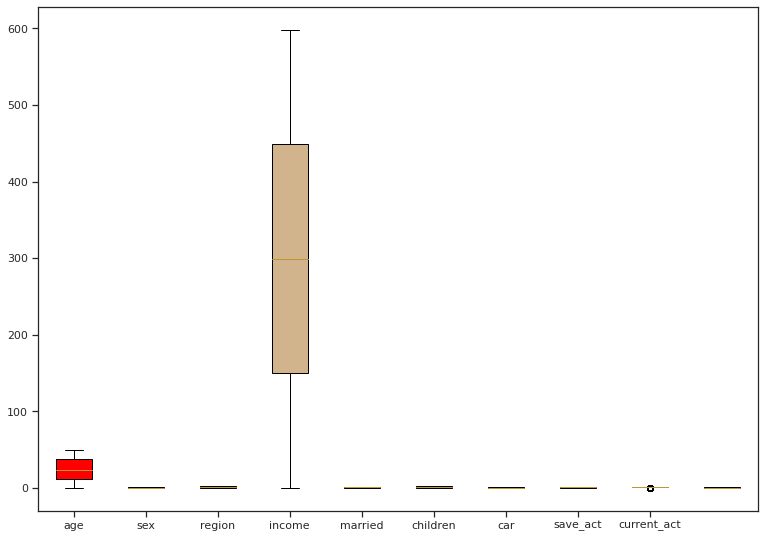

In [ ]:
#plot boxplot to show outlier on iris dataset
import matplotlib.pyplot as plt
mydata = [ bank['age'] ,bank['sex'] ,bank['region'],bank['income'],bank['married'],bank['children'],bank['car'],bank['save_act'],bank['current_act'],bank['mortgage']]
#เขียน code สร้างกราฟ  ลงไปที่นี่
fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(mydata,patch_artist=True)
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['age', 'sex', 'region','income','married','children','car','save_act','current_act','mortgage'])
colors = ['red', 'green', 'purple', 'tan','blue','red','green','purple','tan','blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

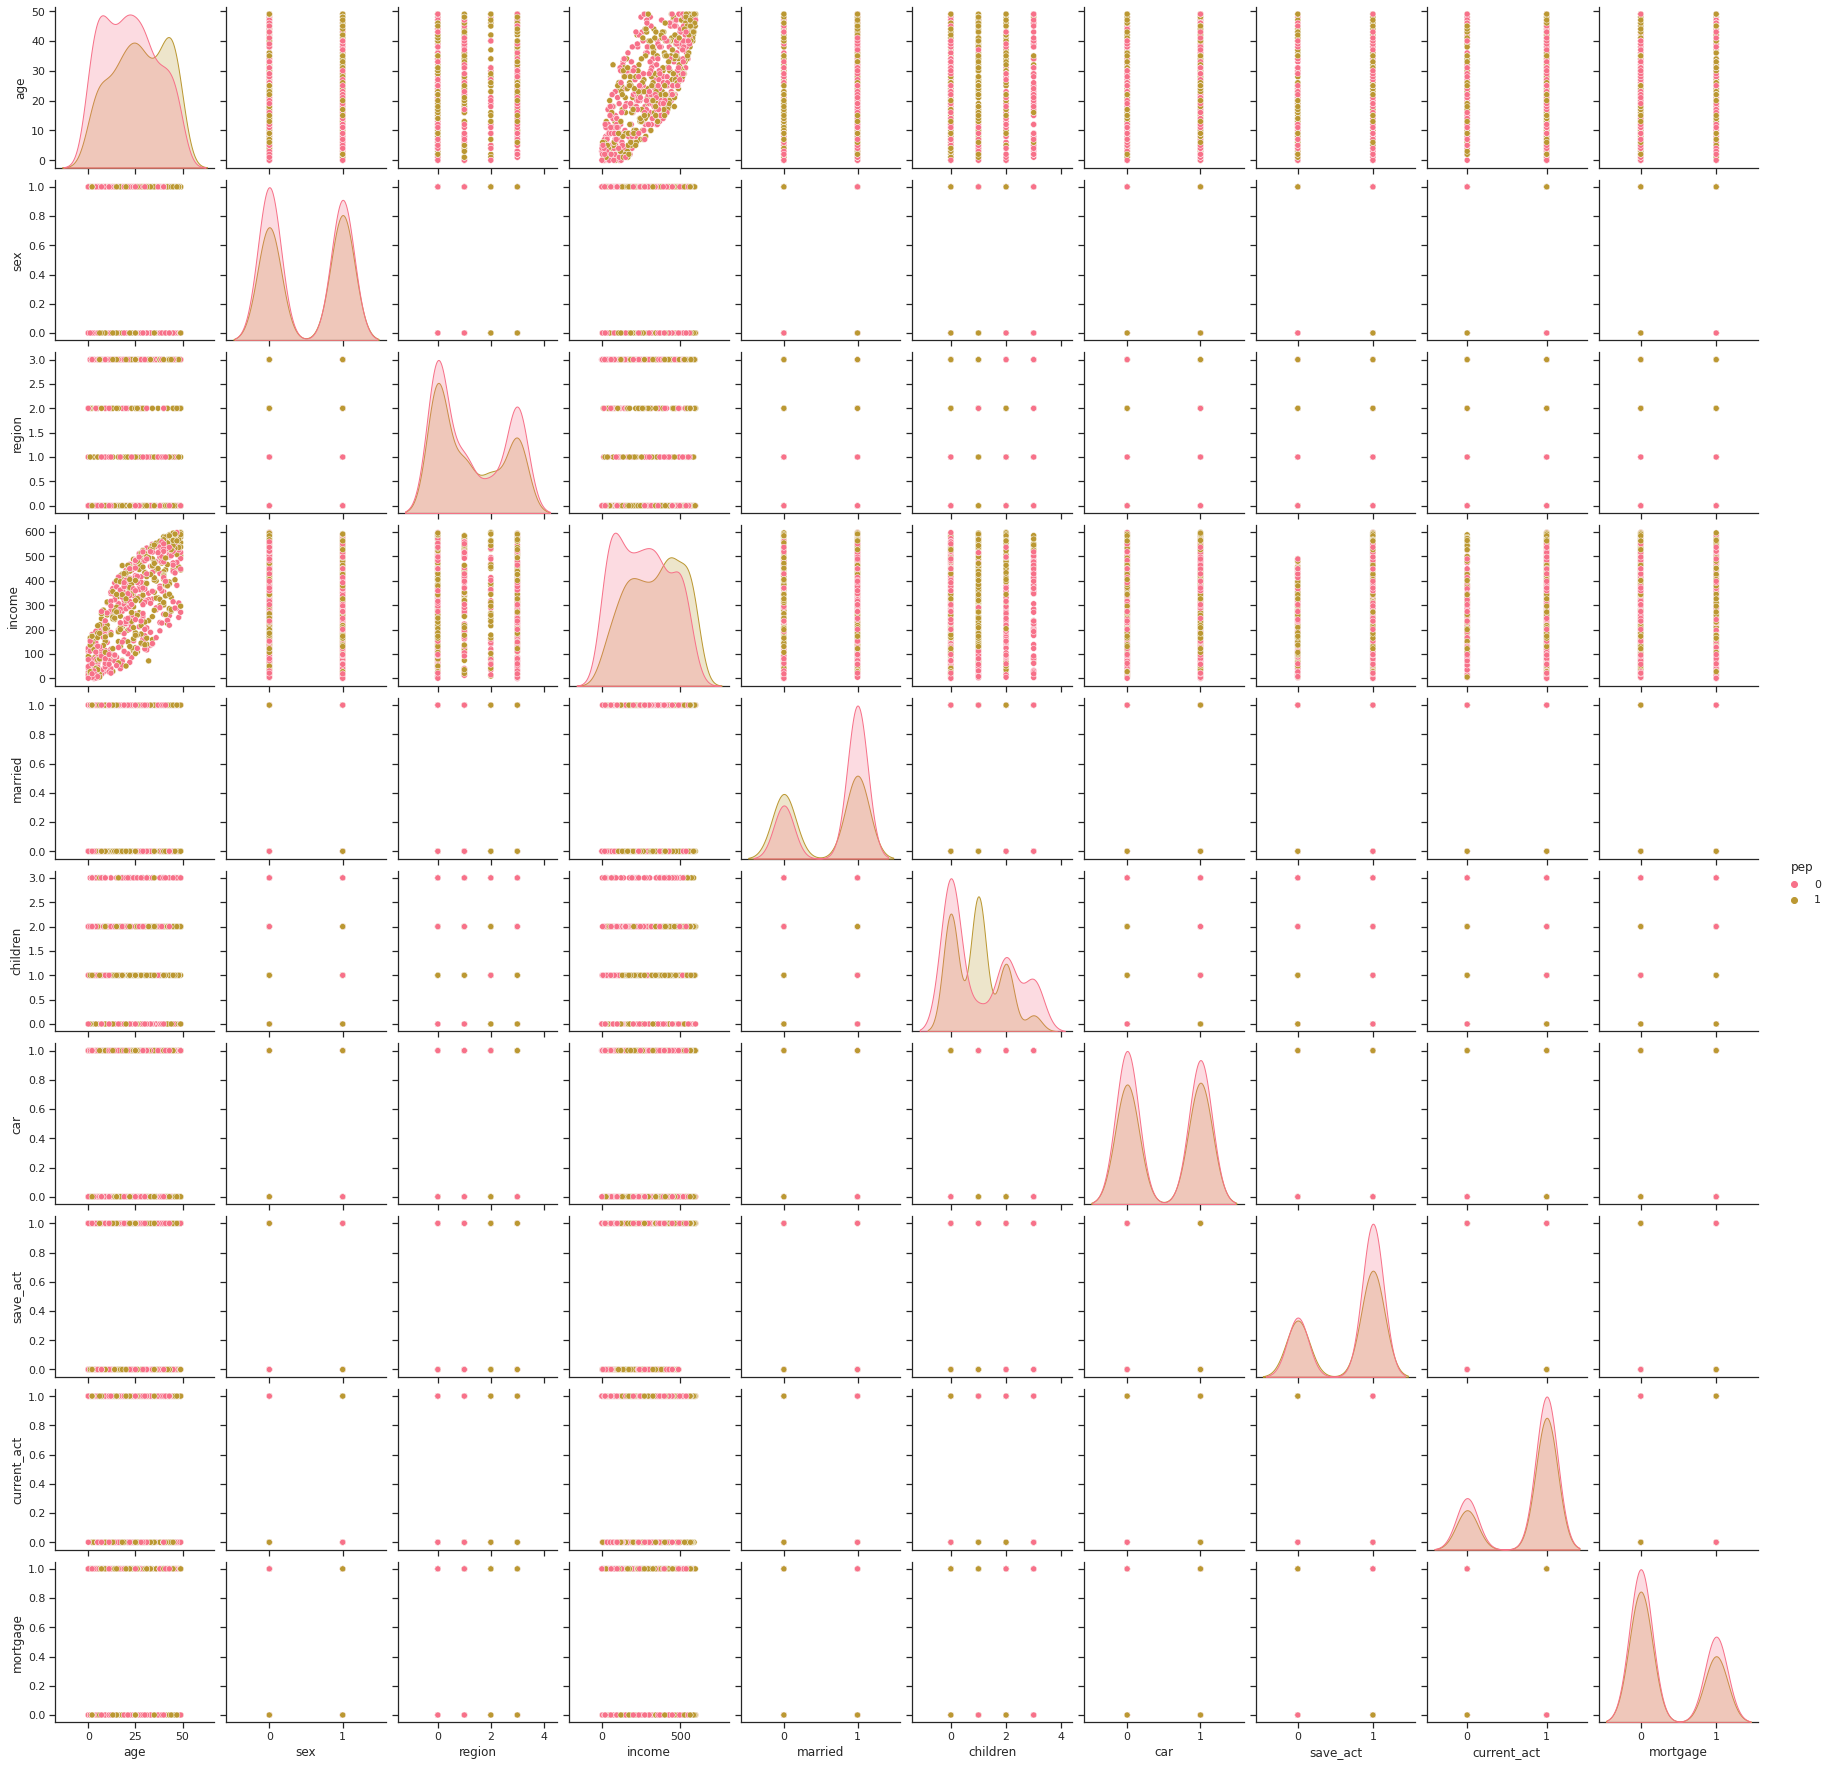

In [ ]:
import seaborn as sns
#plot scatterplot
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(bank.iloc[:,0:11],hue="pep")

In [ ]:
print ("Dataset Shape: ", bank.shape)
bank.describe()

Dataset Shape:  (600, 11)


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,24.395000,0.500000,1.231667,299.296667,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.286113,173.068792,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,149.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,24.000000,0.500000,1.000000,299.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,37.250000,1.000000,3.000000,449.250000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,49.000000,1.000000,3.000000,598.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
bank.groupby('pep').size()

pep
0    326
1    274
dtype: int64

In [ ]:
# Reading the Iris.csv file
X = bank.iloc[:,0:10].values
y = bank.iloc[:,10].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
print(X.shape, y.shape)

(600, 10) (600,)


In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.25)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.8733333333333333
Test data accuracy: 0.8666666666666667


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[79  4]
 [16 51]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        83
           1       0.93      0.76      0.84        67

    accuracy                           0.87       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.87      0.86       150



[Text(0.65, 0.9166666666666666, 'X[5] <= 1.41\nentropy = 0.995\nsamples = 450\nvalue = [243, 207]'),
 Text(0.4, 0.75, 'X[3] <= -1.051\nentropy = 1.0\nsamples = 399\nvalue = [199, 200]'),
 Text(0.2, 0.5833333333333334, 'X[5] <= -0.485\nentropy = 0.839\nsamples = 82\nvalue = [60, 22]'),
 Text(0.1, 0.4166666666666667, 'X[4] <= -0.338\nentropy = 0.979\nsamples = 41\nvalue = [24, 17]'),
 Text(0.05, 0.25, 'X[3] <= -1.708\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]'),
 Text(0.025, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.075, 0.08333333333333333, 'entropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(0.15, 0.25, 'X[0] <= -0.097\nentropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.454\nsamples = 21\nvalue = [19, 2]'),
 Text(0.175, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= -0.374\nentropy = 0.535\nsamples = 41\nvalue = [36, 5]'),
 Text(0.25, 0.2

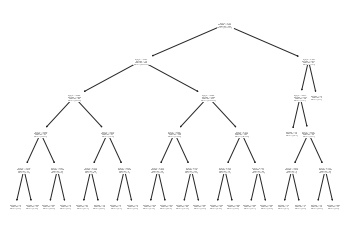

In [ ]:
from sklearn import tree
tree.plot_tree(model)

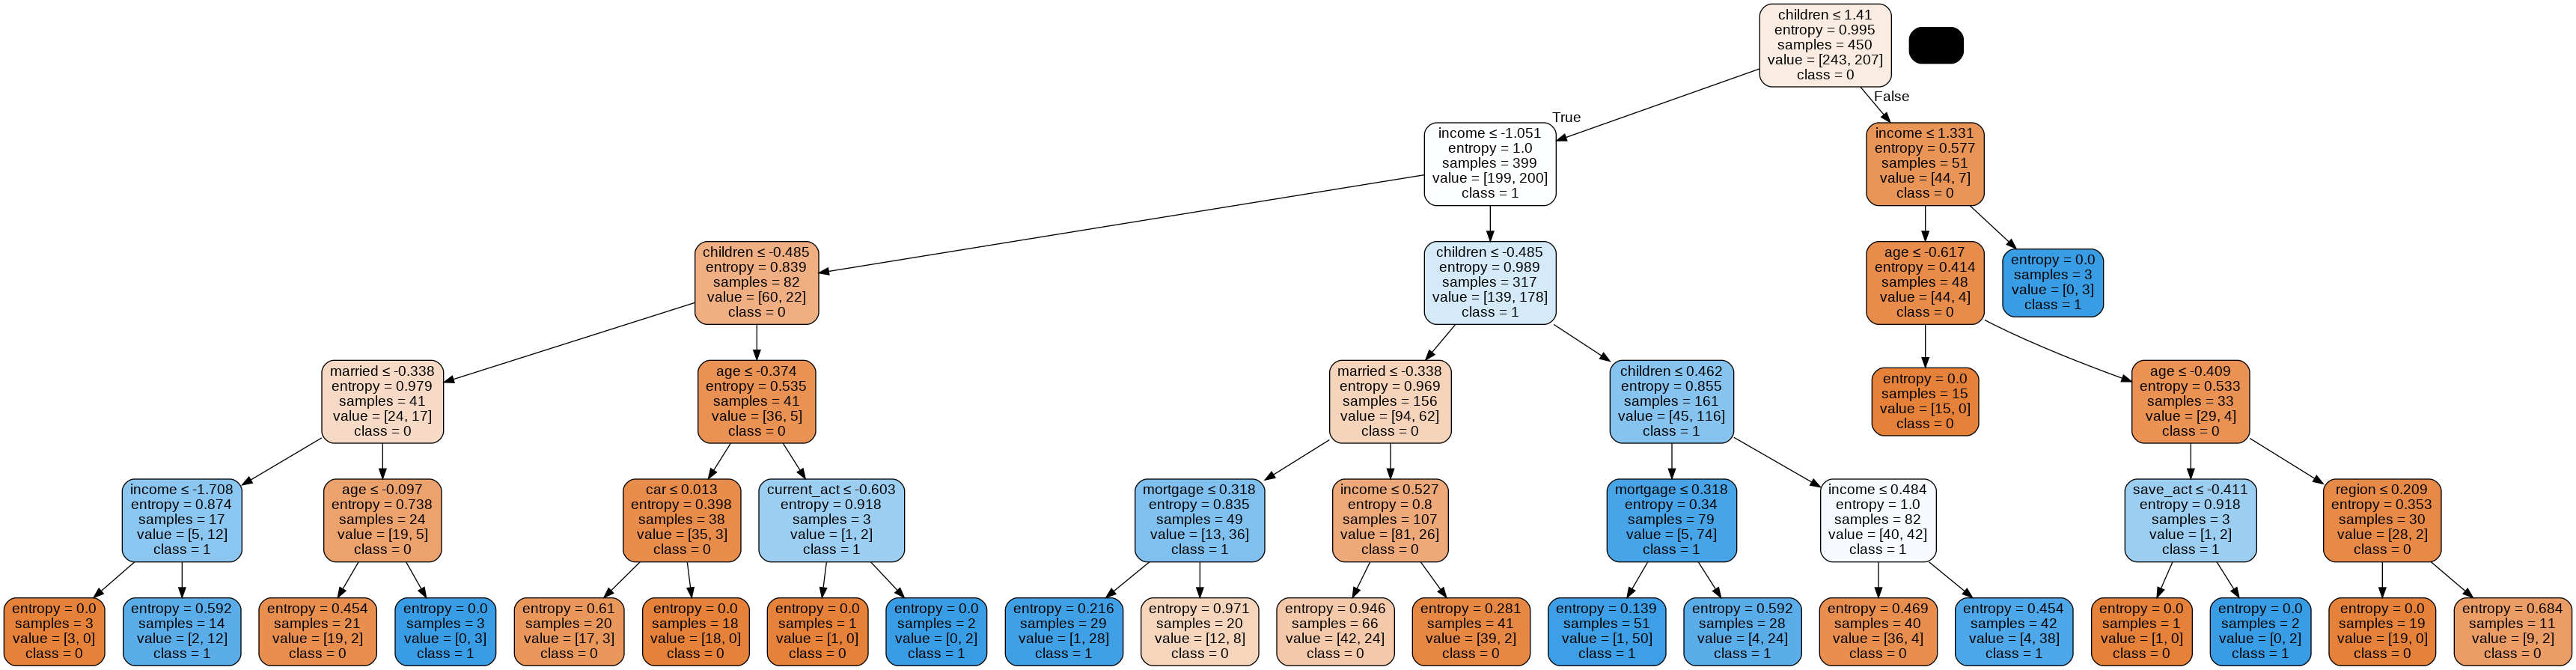

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['age',    'sex',    'region',    'income',    'married',    'children',    'car',    'save_act',    'current_act',    'mortgage']
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1']) #Class Yes/No
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank.png')
Image(graph.create_png())

In [ ]:
X=[[19,1,3,4000,1,0,7,8,9,0],[50,0,4,700,0,3,4,3,2,1],[29,1,2,1800,1,1,3,5,7,1]]  #unseen data
Y_pred=model.predict(X)
print(Y_pred)

[1 1 1]
